## Fitting the first model in sklearn

In [8]:
import pandas as pd
import numpy as np
np.set_printoptions(legacy="1.25")

In [10]:
adult_census = pd.read_csv("../datasets/adult-census-numeric.csv")

In [11]:
adult_census.head()

,age,capital-gain,capital-loss,hours-per-week,class
0,41,0,0,92,<=50K
1,48,0,0,40,<=50K
2,60,0,0,25,<=50K
3,37,0,0,45,<=50K
4,73,3273,0,40,<=50K


In [12]:
target_name = "class"
target = adult_census[target_name]
target

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
39068     <=50K
39069     <=50K
39070      >50K
39071     <=50K
39072      >50K
Name: class, Length: 39073, dtype: object

In [13]:
data = adult_census.drop(columns=[target_name])
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,41,0,0,92
1,48,0,0,40
2,60,0,0,25
3,37,0,0,45
4,73,3273,0,40


In [30]:
?KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [14]:
data.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

In [16]:
data.shape
n_rows = data.shape[0]
n_cols = data.shape[1]

In [17]:
print(f"The dataset contains {n_rows} samples and {n_cols} features.")

The dataset contains 39073 samples and 4 features.


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model = KNeighborsClassifier()

In [20]:
?KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [21]:
model.fit(data, target)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


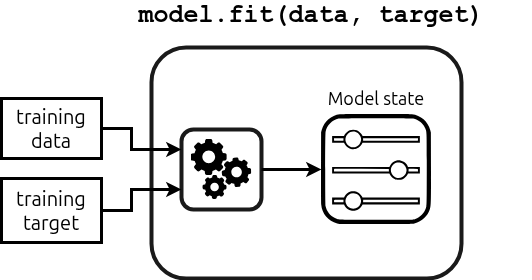

In [22]:
target_predicted = model.predict(data)

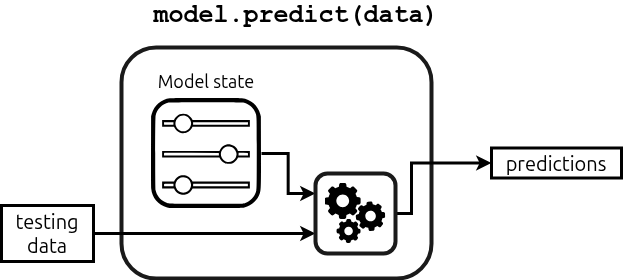

In [23]:
target_predicted[:5]

array([' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K'], dtype=object)

In [24]:
target[:5]

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: class, dtype: object

In [25]:
target[:5] == target_predicted[:5]

0    False
1     True
2     True
3     True
4     True
Name: class, dtype: bool

In [27]:
n_correct = (target[:5] == target_predicted[:5]).sum()

In [28]:
print(f"Number of correct predictions: {n_correct} / 5")

Number of correct predictions: 4 / 5


In [29]:
(target == target_predicted).mean()

0.8242776341719346

### Train-test split

In [31]:
adult_census_test = pd.read_csv("../datasets/adult-census-numeric-test.csv")

In [32]:
target_test = adult_census_test[target_name]

In [33]:
data_test = adult_census_test.drop(columns=[target_name])

In [35]:
nrow_test, ncol_test = data_test.shape

In [36]:
print(f"The testing dataset contains {nrow_test} samples and {ncol_test} features.")

The testing dataset contains 9769 samples and 4 features.


In [37]:
accuracy = model.score(data_test, target_test)

In [38]:
print(f"The test accuracy is {accuracy}")

The test accuracy is 0.8037670181185382


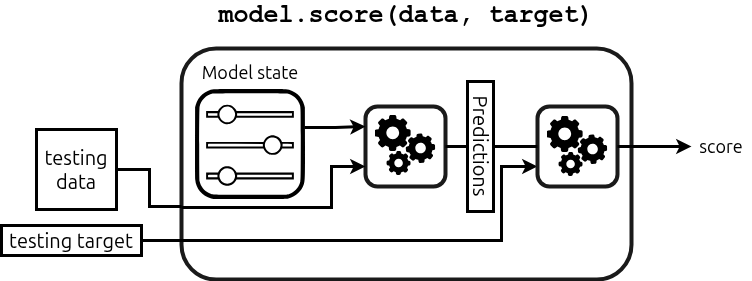


### 📝 Exercise : Adapting your first model
The goal of this exercise is to fit a similar model as we just did to get familiar with manipulating scikit-learn objects and in particular the `.fit/.predict/.score` API.

Before we used `model = KNeighborsClassifier()`. All scikit-learn models can be created without arguments. This is convenient because it means that you don’t need to understand the full details of a model before starting to use it.

One of the KNeighborsClassifier parameters is n_neighbors. It controls the number of neighbors we are going to use to make a prediction for a new data point.

#### 1. What is the default value of the n_neighbors parameter? 
Hint: Look at the documentation on the scikit-learn website or directly access the description inside your notebook by running the following cell. This will open a pager pointing to the documentation.
```python
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier?
```

#### 2. Create a KNeighborsClassifier model with n_neighbors=50

a. Fit this model on the train data and target that we used before
b. Use your model to make predictions on the first 10 data points inside the data. Do they match the actual target values?
c. Compute the accuracy on the training data.
d. Now load the test data from "../datasets/adult-census-numeric-test.csv" and compute the accuracy on the test data.

#### 3. (Optional) Find the optimal n_neighbors
What is the optimal number of neighbors to fit a K-neighbors classifier on this dataset?



### Solutions

#### 1.

In [40]:
?KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [41]:
model = KNeighborsClassifier(n_neighbors=50)
model.fit(data, target)

,n_neighbors,50
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [42]:
predictions_in = model.predict(data)

In [43]:
accuracy_train = model.score(data, target)
print(f"Accuracy on training set: {accuracy_train}")

Accuracy on training set: 0.8290379545978042


In [44]:
accuracy_test = model.score(data_test, target_test)
print(f"Accuracy on test set: {accuracy_test}")

Accuracy on test set: 0.8177909714402702
